# Case Study Name:1  Amazon Electronics Sales Analysis

In [11]:
import pandas as pd
file_path = (r'C:\Users\shrey\Downloads\archive (3)\amazon.csv')



In [13]:

df = pd.read_csv(file_path)

# Remove non-numeric characters from prices and convert to numeric
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)

# Convert ratings to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Remove commas from 'rating_count' and convert to numeric, fill NaN with 0
df['rating_count'] = df['rating_count'].replace(',', '', regex=True)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce').fillna(0).astype(int)

# Display the cleaned data
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Sales Trend Analysis:
Analyze sales trends over time by grouping data by date.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1244: UserWarning: Attempting to set identical left == right == 636.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


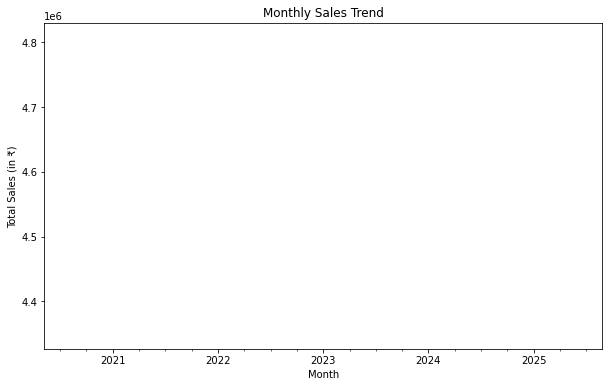

In [15]:
import matplotlib.pyplot as plt

# Group by date and sum the sales
sales_trend = df.groupby(df['date'].dt.to_period('M')).sum()['discounted_price']

# Plot the sales trend
plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (in ₹)')
plt.show()


# Customer Rating Analysis:
Analyze the distribution of customer ratings.

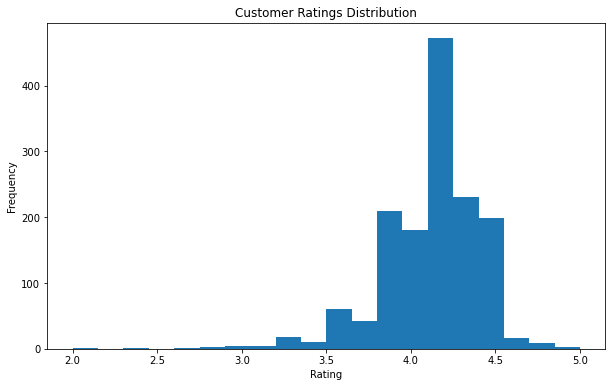

In [16]:
# Plot the distribution of customer ratings
plt.figure(figsize=(10, 6))
df['rating'].plot(kind='hist', bins=20, title='Customer Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Category Performance:
Analyze the performance of different product categories.

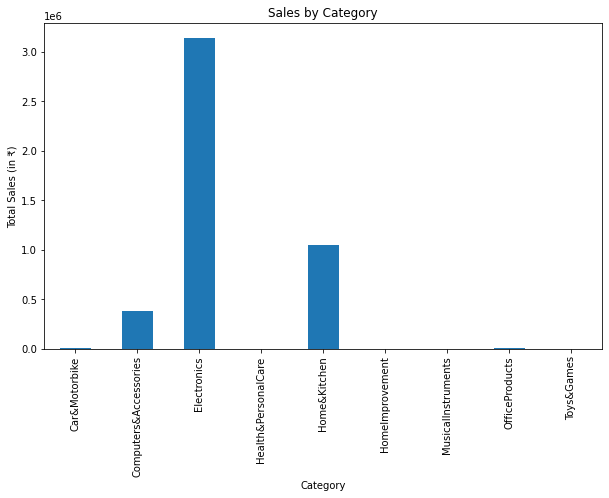

In [17]:
# Split the category column to get the main category
df['main_category'] = df['category'].str.split('|').str[0]

# Group by main category and sum the sales
category_performance = df.groupby('main_category').sum()['discounted_price']

# Plot the category performance
plt.figure(figsize=(10, 6))
category_performance.plot(kind='bar', title='Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (in ₹)')
plt.show()


# Time-Series Analysis:
Perform time-series analysis on sales data.

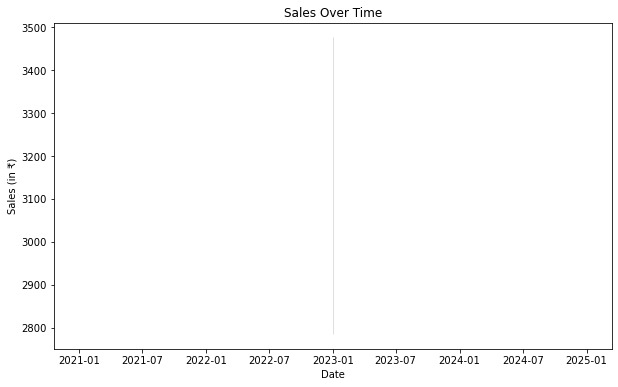

In [19]:
import seaborn as sns

# Plot the time-series sales data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='discounted_price')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (in ₹)')
plt.show()


## Case Study 2: Student Enrollment Analysis by Class


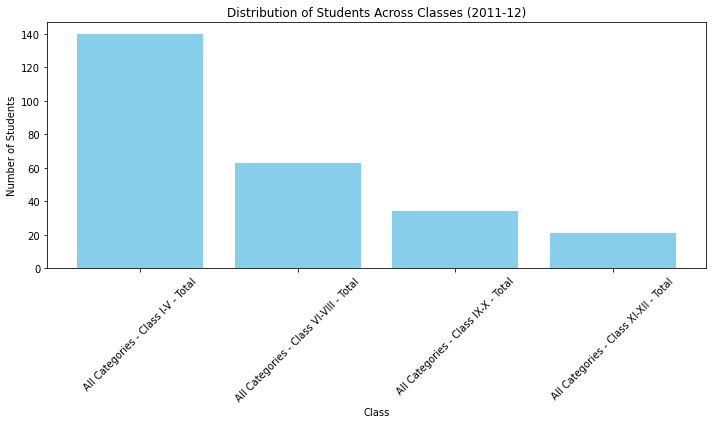

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the student data
file_path = (r'C:\Users\shrey\Downloads\Statement_SES_2011-12-Enrlment.csv')

student_data = pd.read_csv(file_path)

# Extract relevant columns for a specific year, for example, 2011-12
year_data = student_data[student_data['Year'] == '2011-12']

# Selecting columns related to class enrollment for the specified year
class_columns = [
    'All Categories - Class I-V - Total', 
    'All Categories - Class VI-VIII - Total', 
    'All Categories - Class IX-X - Total', 
    'All Categories - Class XI-XII - Total'
]

class_data = year_data[class_columns].T
class_data.columns = ['Student Count']
class_data.reset_index(inplace=True)
class_data.rename(columns={'index': 'Class'}, inplace=True)

# Generate a bar chart to visualize the distribution of students across classes
plt.figure(figsize=(10, 6))
plt.bar(class_data['Class'], class_data['Student Count'], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Students')
plt.title('Distribution of Students Across Classes (2011-12)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Case Study:3 Daily Temperature Changes Over Time in a City

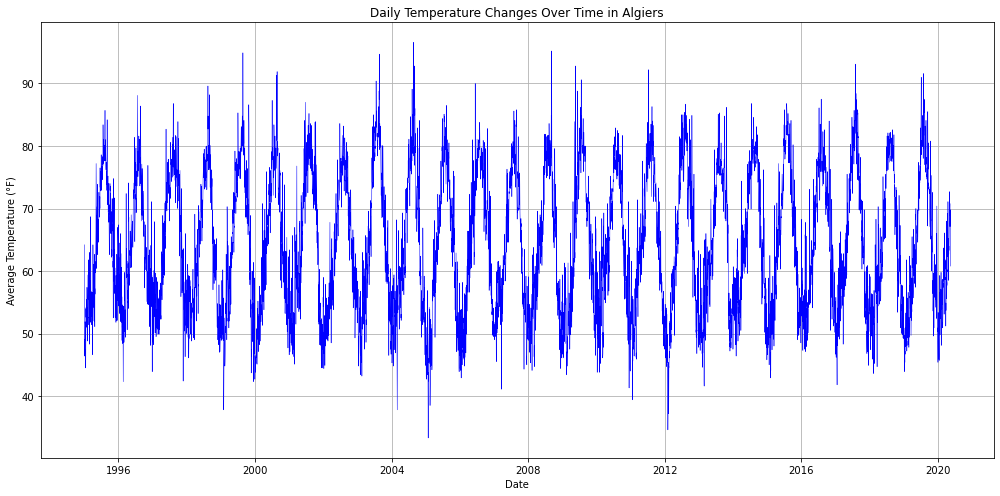

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the temperature data
file_path_temp = (r'C:\Users\shrey\Downloads\city_temperature.csv\city_temperature.csv')
temperature_data = pd.read_csv(file_path_temp, dtype={'State': str})

# Filter data for the city "Algiers"
city_data = temperature_data[(temperature_data['City'] == 'Algiers') & (temperature_data['AvgTemperature'] != -99)].copy()

# Combine 'Year', 'Month', and 'Day' columns to create a 'Date' column
city_data.loc[:, 'Date'] = pd.to_datetime(city_data[['Year', 'Month', 'Day']])

# Set 'Date' as the index
city_data.set_index('Date', inplace=True)

# Sort the data by date
city_data.sort_index(inplace=True)

# Plot the daily temperature changes over time
plt.figure(figsize=(14, 7))
plt.plot(city_data.index, city_data['AvgTemperature'], color='blue', linestyle='-', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.title('Daily Temperature Changes Over Time in Algiers')
plt.grid(True)
plt.tight_layout()
plt.show()


## Case Study 4: Stock Analysis


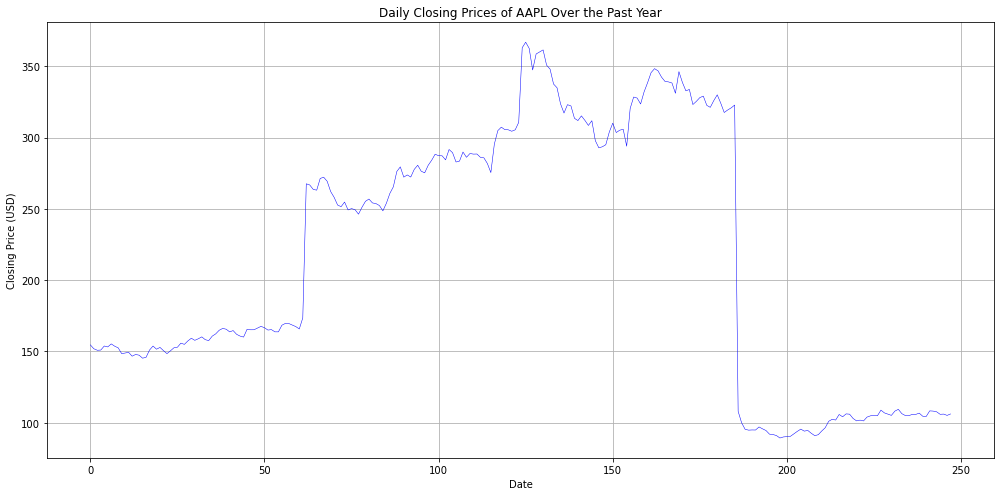

In [26]:
import matplotlib.pyplot as plt
import pandas as pd


# Load the stock data
file_path_stock = (r'C:\Users\shrey\Downloads\archive (3)\stocks.csv')
stock_data = pd.read_csv(file_path_stock)
# Plot the daily closing prices
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], color='blue', linestyle='-', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('Daily Closing Prices of AAPL Over the Past Year')
plt.grid(True)
plt.tight_layout()
plt.show()


# Case Study 5: Visualizing Monthly Expenses in Spending Categories

In [27]:
import pandas as pd

# Sample data for monthly expenses
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Groceries': [300, 320, 310, 305, 290, 300, 315, 325, 310, 300, 290, 295],
    'Utilities': [150, 145, 160, 155, 150, 140, 145, 150, 155, 160, 150, 145],
    'Entertainment': [100, 120, 110, 115, 105, 110, 120, 125, 115, 110, 100, 105],
    'Transportation': [200, 190, 195, 205, 210, 200, 195, 190, 200, 210, 205, 200],
    'Healthcare': [80, 85, 90, 80, 85, 90, 85, 90, 80, 85, 90, 85]
}

# Create a DataFrame
expense_data = pd.DataFrame(data)

# Display the first few rows of the dataframe
expense_data.head()


,Month,Groceries,Utilities,Entertainment,Transportation,Healthcare
0,January,300,150,100,200,80
1,February,320,145,120,190,85
2,March,310,160,110,195,90
3,April,305,155,115,205,80
4,May,290,150,105,210,85


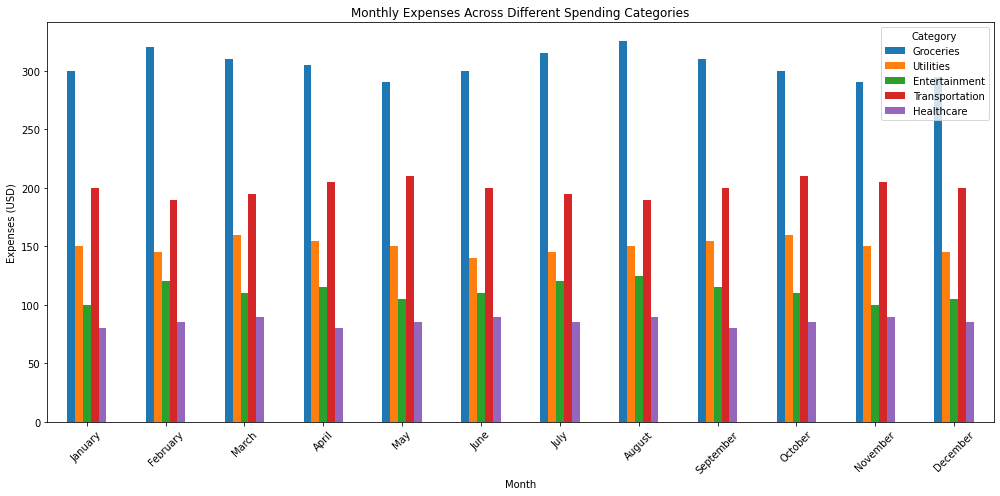

In [28]:
import matplotlib.pyplot as plt

# Set the index to 'Month' for better plotting
expense_data.set_index('Month', inplace=True)

# Plot the bar chart
expense_data.plot(kind='bar', figsize=(14, 7))
plt.xlabel('Month')
plt.ylabel('Expenses (USD)')
plt.title('Monthly Expenses Across Different Spending Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Category')
plt.show()
